<a href="https://colab.research.google.com/github/vasiliyeskin/MachineLearningExperiences/blob/master/FashionMNIST/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognition of the fashion with Keras

In [1]:
# dataset of models
from tensorflow.keras.datasets import fashion_mnist
# модель нейронной сети с последовательным соединением нейронов
from tensorflow.keras.models import Sequential
# подключаем полносвязную нейронную сеть (dense)
from tensorflow.keras.layers import Dense
# утилиты для keras
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
# отрисовка изображений
import matplotlib.pyplot as plt

from google.colab import files
import numpy as np
from PIL import Image

## Подготовка данных для обучения сети

In [2]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# классификация выходных данных
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

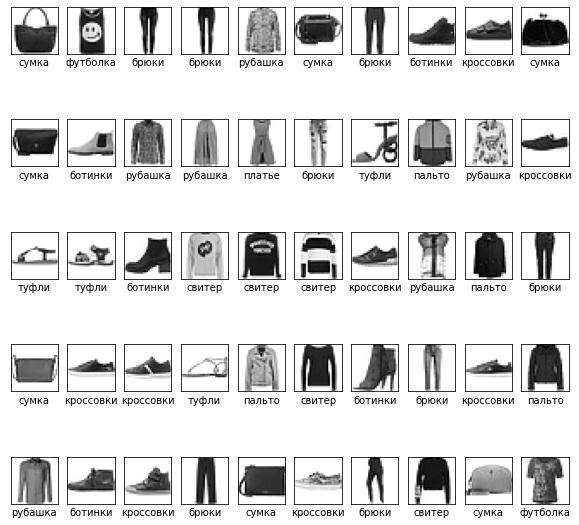

In [5]:
# примеры изображений
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

 ### Преобразование размерности изображения (из картинки в плоскую последовательность "плоский вектор")

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### Нормализуем данные: делим на 255 градаций серового. Таким образом данные будут в диапазоне от нуля до 1

In [8]:
x_train = x_train / 255
x_test = x_test / 255

## Работа с правильными ответами

Просматриваем пример правильного ответа

In [9]:
print(y_train[0])


9


### Преобразуем метки в формат one hot encoding

In [10]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

### Правильный ответ в формате one hot encoding

In [11]:
print(y_train[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

Архитектура нейронной сети

In [13]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

Компиляция сети

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучение сети

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 4s 16ms/step - loss: 1.2150 - accuracy: 0.6444 - val_loss: 0.8479 - val_accuracy: 0.7422
Epoch 2/100
240/240 [==============================] - 3s 15ms/step - loss: 0.7689 - accuracy: 0.7586 - val_loss: 0.7010 - val_accuracy: 0.7798
Epoch 3/100
240/240 [==============================] - 4s 15ms/step - loss: 0.6684 - accuracy: 0.7885 - val_loss: 0.6331 - val_accuracy: 0.7970
Epoch 4/100
240/240 [==============================] - 3s 14ms/step - loss: 0.6150 - accuracy: 0.8036 - val_loss: 0.5941 - val_accuracy: 0.8063
Epoch 5/100
240/240 [==============================] - 4s 15ms/step - loss: 0.5802 - accuracy: 0.8133 - val_loss: 0.5662 - val_accuracy: 0.8150
Epoch 6/100
240/240 [==============================] - 3s 14ms/step - loss: 0.5552 - accuracy: 0.8196 - val_loss: 0.5440 - val_accuracy: 0.8213
Epoch 7/100
240/240 [==============================] - 4s 15ms/step - loss: 0.5355 - accuracy: 0.8229 - val_loss: 0.5276 - val_accuracy:

## Сохраняем нейронную сеть для последующего использования

In [17]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения
### Проверка качества работы на наборе данных для тестирования

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3774 - accuracy: 0.8666


## Используем сеть для распознавания моделей одежды

In [19]:
# Запускаем распознавание набора данных, на котором обучалась сеть
predictions = model.predict(x_train)


### Проверяем качество распознавания

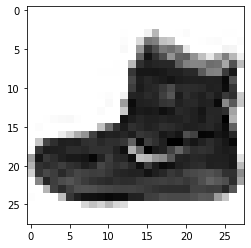

In [20]:
# Просматриваем пример изображения
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()


### Данные на выходе из сети в формате one-hot-encoding

In [21]:
print(predictions[n])


[2.6748532e-08 2.4840643e-10 8.6660207e-10 1.5798960e-09 3.0617051e-10
 2.0874260e-04 7.7682671e-08 1.7484855e-03 4.9091832e-06 9.9803776e-01]


### Определяем номер класса изображения, который предлагает сеть

In [22]:
np.argmax(predictions[n])


9

### Печатаем название класса

In [23]:
classes[np.argmax(predictions[n])]


'ботинки'

### Печатаем номер класса правильного ответа

In [24]:
np.argmax(y_train[n])


9

### Печатаем название класса правильного ответа

In [25]:
classes[np.argmax(y_train[n])]


'ботинки'

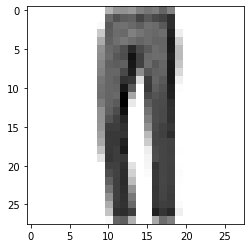

Номер класса: 1
Название класса: брюки
Номер класса: 9
Название класса: ботинки


In [26]:
n_rec = 496
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
# Меняем размерность изображения и нормализуем его
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

# Запускаем распознавание
prediction = model.predict(x)

# Печатаем результаты распознавания
prediction

# Преобразуем результаты из формата one hot encoding
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

# Печатаем правильный ответ
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])



Загружаем свою картинку

In [30]:
files.upload()

Saving index.jpg to index.jpg


{'index.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xfc\x00\xff\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc

In [29]:
# Проверяем загрузку картинки
!ls

fashion_mnist_dense.h5	index.png  sample_data


In [31]:
# Загружаем картинку из файла
img_path = 'index.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

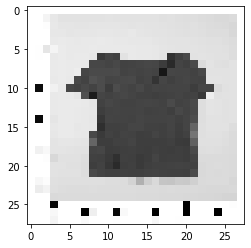

In [32]:
# Показываем картинку

plt.imshow(img.convert('RGBA'))
plt.show()

In [33]:
# Преобразуем картинку для обработки нейронной сетью

# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x = x / 255

In [34]:
# Запускаем распознавание
prediction = model.predict(x)

# Результаты распознавания
prediction

prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 6
Название класса: рубашка
